In [125]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# 시각화를 위한 폰트 설정
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [127]:
# 데이터 준비
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

### 📌 Q1. 전국 시도별 약국수를 구해주세요!
- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
- 다음의 결과가 나오도록 구합니다.

### ✅ Q1 문제풀이)
```
df_drug = df[df['상권업종소분류명'] == '약국']
df_drug['시도명'].value_counts()
```

In [128]:
df_drug = df[df['상권업종소분류명'] == '약국']
df_drug['시도명'].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

### 📌 Q2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?
- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.

### ✅ Q2 문제풀이)
```
df_vet = df[df['상권업종소분류명'] == '동물병원']

# 판다스로 bar chart 그리기
df_vet['시도명'].value_counts().plot.barh()

# seaborn으로 barchart 그릭
x = pd.DataFrame(df_vet['시도명'].value_counts()).reset_index()
x.columns = ['시도명', '동뭉병원의 수']

sns.barplot(x=x['동뭉병원의 수'], y=x['시도명'])
```

In [129]:
df_vet = df[df['상권업종소분류명'] == '동물병원']
df_vet['시도명'].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

#### 1) 판다스로 bar chart 그리기

<AxesSubplot: >

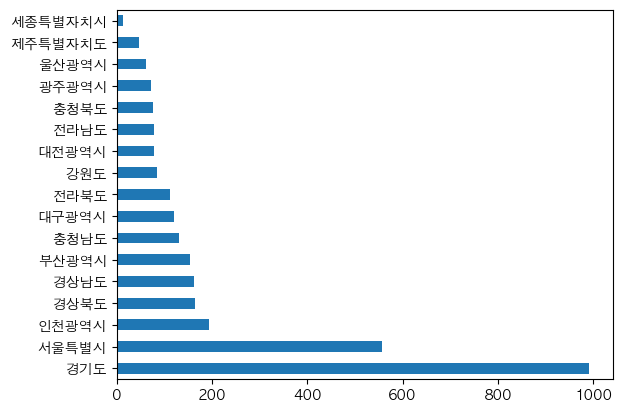

In [130]:
# barchart 만들기
df_vet['시도명'].value_counts().plot.barh()


#### 2) seaborn을 활용하여 barchart 그리기

<AxesSubplot: xlabel='동뭉병원의 수', ylabel='시도명'>

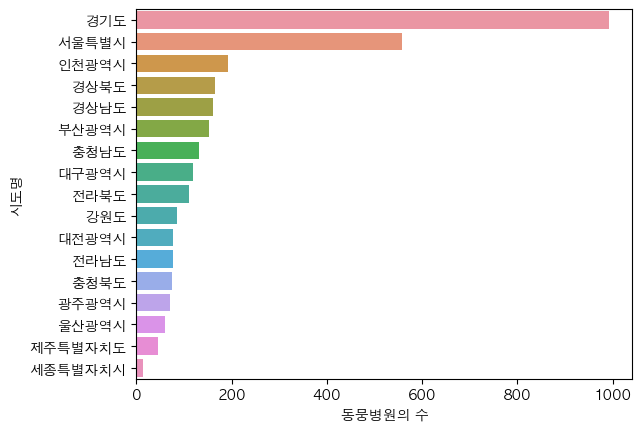

In [131]:
x = pd.DataFrame(df_vet['시도명'].value_counts()).reset_index()
x.columns = ['시도명', '동뭉병원의 수']

sns.barplot(x=x['동뭉병원의 수'], y=x['시도명'])

### 📌Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.
- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!

### Q3 문제풀이) 
```
# 시도명이 서울인 데이터만 뽑기
df_seoul = df[df['시도명'] == '서울특별시']

# 상권업종소분류명에 "피부"나 "성형"이 들어간 병원 분류하기
df_seoul_cos = df_seoul[(df_seoul['상권업종소분류명'].str.contains('피부')) | (df_seoul['상권업종소분류명'].str.contains('성형'))]

# 상호명에 "피부"나 "성형"이 들어가지 않는 병원을 제거하기
drop_rows = df_seoul_cos[~df_seoul_cos['상호명'].str.contains("피부|성형")]['상호명'].index.tolist()
df_seoul_cos = df_seoul_cos.drop(drop_rows, axis=0)

# 피부, 성형외과 수 / 전체 병원 수로 비율을 구하기 
df_seoul_hospital = df_seoul[df_seoul['상권업종중분류명'] == '병원']
drop_rows2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index.tolist()

df_seoul_hospital = df_seoul_hospital.drop(drop_rows2, axis=0)

df_ratio = (df_seoul_cos['시군구명'].value_counts() / df_seoul_hospital['시군구명'].value_counts()).round(2).sort_values(ascending=False)
df_ratio

```

In [132]:
# 시도명이 서울인 데이터만 뽑기
df_seoul = df[df['시도명'] == '서울특별시']
df_seoul.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
8,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893.0,6025.0,NaN,4,NaN,127.028531,37.522223


In [133]:
# 상권업종소분류명에 "피부"나 "성형"이 들어간 병원 분류하기
df_seoul_cos = df_seoul[(df_seoul['상권업종소분류명'].str.contains('피부')) | (df_seoul['상권업종소분류명'].str.contains('성형'))]
df_seoul_cos.shape

(1373, 39)

In [134]:
# 상호명에 "피부"나 "성형"이 들어가지 않는 병원을 제거하기
drop_rows = df_seoul_cos[~df_seoul_cos['상호명'].str.contains("피부|성형")]['상호명'].index.tolist()

df_seoul_cos = df_seoul_cos.drop(drop_rows, axis=0)

In [135]:
df_seoul_cos.shape

(878, 39)

In [136]:
# 전체 병원 수 구하기 
df_seoul_hospital = df_seoul[df_seoul['상권업종중분류명'] == '병원']
drop_rows2 = df_seoul_hospital[df_seoul_hospital['상호명'].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index.tolist()

print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_rows2, axis=0)
print(df_seoul_hospital.shape)

(13406, 39)
(13389, 39)


In [137]:
df_ratio = (df_seoul_cos['시군구명'].value_counts() / df_seoul_hospital['시군구명'].value_counts()).round(2).sort_values(ascending=False)
df_ratio

강남구     0.19
서초구     0.11
강동구     0.05
중구      0.04
송파구     0.04
성북구     0.04
서대문구    0.04
마포구     0.04
노원구     0.03
은평구     0.03
광진구     0.03
성동구     0.03
영등포구    0.03
양천구     0.02
강북구     0.02
종로구     0.02
용산구     0.02
관악구     0.02
강서구     0.02
구로구     0.02
동작구     0.02
동대문구    0.02
중랑구     0.02
도봉구     0.01
금천구     0.01
Name: 시군구명, dtype: float64

### 📌Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.
- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- folium 문서 : https://python-visualization.github.io/folium/quickstart.html

In [138]:
df_sliver_care = df[df['상권업종소분류명'] == '노인/치매병원']
df_sliver_care.shape

(1055, 39)

In [139]:
import folium

map = folium.Map(location=[df_sliver_care['위도'].mean(), df_sliver_care['경도'].mean()], zoom_start=7)

In [140]:
for i in df_sliver_care.index:
    name = df_sliver_care['상호명'][i]
    address = df_sliver_care['도로명주소'][i]
    popup = f"상호명: {name}, 도로명주소: {address}"
    location = [df_sliver_care['위도'][i], df_sliver_care['경도'][i]]

    folium.Marker(location=location, popup=popup).add_to(map)

map


In [141]:
import folium
from folium import Marker
from folium.plugins import MarkerCluster

map = folium.Map(location=[df_sliver_care['위도'].mean(), df_sliver_care['경도'].mean()], zoom_start=7)

In [142]:
mc = MarkerCluster()

for i in df_sliver_care.index:
    name = df_sliver_care['상호명'][i]
    address = df_sliver_care['도로명주소'][i]
    popup = f"상호명: {name}, 도로명주소: {address}"
    location = [df_sliver_care['위도'][i], df_sliver_care['경도'][i]]

    mc.add_child(Marker(location=location, popup=popup))

mc.add_to(map)

map